Technical Neural Networks

WS 2024/25

Assignment Group A

Can Tosun (2792747), Christopher Overdiek (3122952),
Zyad Altahan (50238152), Isra Zaman (50203794)

Programming Assignment E

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import fileinput

rng = np.random.default_rng()

X(t = 0): ++-++++---
X(t = 1): ++++++++++
Result: ++++++++++
We see that the random pattern gets associated to all 1s which is the inverse of the learned pattern of all 0s
X(t = 0): ++-++++---
X(t = 1): -+-+++--++
Result: -+-+++--++
We see that the random pattern gets associated to the inverse of the learned random pattern
X(t = 0): --+---+---+-+-------+++++----+-----+--------------
X(t = 1): --------------------------------------------------
Result: --------------------------------------------------
We see that the random pattern gets associated to all 0s which is included in our learned patterns
X(t = 0): --+---+---+-+-------+++++----+-----+-------------+
X(t = 1): --------------------------------------------------
Result: --------------------------------------------------
We see that this slightly modified recall pattern also gets associated to all 0s
X(t = 0): --+---+---+-+-------+++++----+-----+--------------
X(t = 1): ------------------------------------------------++
Result: ---

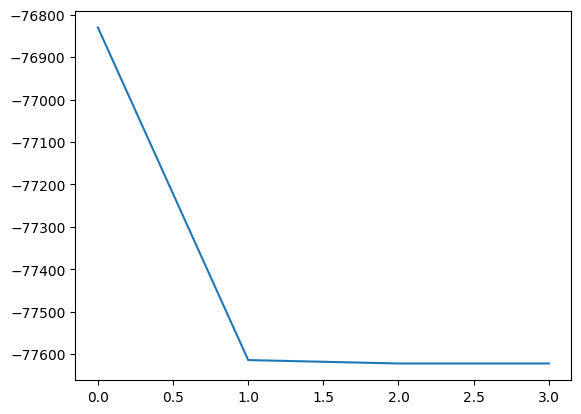

In [132]:
def loadData(trainingFileName, recallingFileName):
  p = []
  with fileinput.input(files=trainingFileName, encoding="utf-8") as f:
      for line in f:
          if f.filelineno() > 1:
              p.append(list(map(int, line.split())))

  p = np.array(p)
  assert np.all(np.isin(p, [-1, 1])), "Input patterns must be bipolar (+1 or -1)."

  with fileinput.input(files=recallingFileName, encoding="utf-8") as f:
    it = iter(f)
    next(it)
    r = list(map(int, next(it).split()))

  r = np.array(r)
  assert np.all(np.isin(r, [-1, 1])), "Recalling patterns must be bipolar (+1 or -1)."

  theta = np.zeros((len(p[0]))) #We chose to set the thetas to 0
  EnergyList = []
  return p, r, theta, EnergyList

def learn(p):
  w = np.zeros((len(p[0]), len(p[0])))

  for q in p:
    v = np.outer(q, q)
    np.fill_diagonal(v, 0)
    w += v

  assert np.array_equal(w, w.T), "Weight matrix must be symmetric."

  return w

def recall(w, input, theta, EnergyList):
  X = input
  t = 0
  for _ in range(1000): #to prevent infinite loop with while(True)
    print(f"X(t = {t}): ", end='')
    printOutput(X, w, theta, EnergyList)
    t += 1

    Xt_plus1 = X.copy()
    for k in rng.permutation(len(X)): #random order of asynchronous updates
      if np.dot(w[k], X) > theta[k]:
        Xt_plus1[k] = 1
      else:
        Xt_plus1[k] = -1
    if np.array_equal(Xt_plus1, X):
      break
    X = Xt_plus1

  return X

def printOutput(a, w, theta, EnergyList):
  if len(a) < 101:
    for i in a:
      if i == 1:
        print('+', end='') #end='' prevents newline
      else:
        print('-', end='')
    print('')
  else:
    E = -0.5 * np.dot(a.T, np.dot(w, a)) + np.dot(theta.T, a)
    EnergyList.append(E)
    print("E = " + str(E))

def run(p, r, theta, EnergyList):
  w = learn(p)
  result = recall(w, r, theta, EnergyList)
  print("Result: ", end='')
  printOutput(result, w, theta, EnergyList)
  if len(p[0]) > 100:
    plt.plot(range(len(EnergyList)), EnergyList)

p, r, theta, EnergyList = loadData("PA-E_train_1.txt", "PA-E_recall_1.txt")
run(p, r, theta, EnergyList)
print("We see that the random pattern gets associated to all 1s which is the inverse of the learned pattern of all 0s")

p, r, theta, EnergyList = loadData("PA-E_train_2.txt", "PA-E_recall_1.txt")
run(p, r, theta, EnergyList)
print("We see that the random pattern gets associated to the inverse of the learned random pattern")

p, r, theta, EnergyList = loadData("PA-E_train_3.txt", "PA-E_recall_2.txt")
run(p, r, theta, EnergyList)
print("We see that the random pattern gets associated to all 0s which is included in our learned patterns")

p, r, theta, EnergyList = loadData("PA-E_train_3.txt", "PA-E_recall_3.txt")
run(p, r, theta, EnergyList)
print("We see that this slightly modified recall pattern also gets associated to all 0s")

p, r, theta, EnergyList = loadData("PA-E_train_4.txt", "PA-E_recall_2.txt")
run(p, r, theta, EnergyList)
print("This time we have modified the learned patterns to exclude the 0 which was the previous result, we can see that this time it gets associated to binary 3 which is also included in our learned patterns")

p, r, theta, EnergyList = loadData("PA-E_train_4.txt", "PA-E_recall_3.txt")
run(p, r, theta, EnergyList)
print("Also tested with the slightly modified recall pattern, the result is the same")

p, r, theta, EnergyList = loadData("PA-E_train_4.txt", "PA-E_recall_4.txt")
run(p, r, theta, EnergyList)
print("Now we are trying to recall a pattern that was not included in our learned patterns, which gives us a similar pattern from our learned ones")

p, r, theta, EnergyList = loadData("PA-E_train_5.txt", "PA-E_recall_5.txt")
run(p, r, theta, EnergyList)
print("Now testing for K > 100, we confirm that our energy function decreases as we update")